In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [5]:
etc = pd.read_csv('naver_naver_dataframe.csv',encoding = 'utf-8')

In [6]:
len(etc)

490

In [7]:
etc.head()

,Unnamed: 0,title,contents
0,0,"‘손잡은 포식자들’ CJ-네이버, 주가도 승자 독식?",CJ대한통운 최근 3거래일 약 3% 하락...스튜디오드래곤 5.3%↓“자사주 교환 ...
1,1,CJ·네이버 약점 보완…주가 중장기 긍정적,◆ 손잡은 CJ-네이버 ◆증권가에서는 네이버와 CJ그룹 주요 계열사 간 지분 맞교환...
2,2,"한 배를 탄 네이버·CJ, 주가는 엇갈렸다",[머니투데이 정인지 기자] [[특징주 마감]]네이버와 CJ그룹이 전략적 지분 교환을...
3,3,“테슬라 주가 네이버에서 확인하자”···모바일 증권 ‘해외 종목’ 서비스 시작,미국·중국·일본·홍콩·베트남 5개국주요지수·기업정보·제무제표 등 확인네이버 모바일 ...
4,4,"테슬라 주가는?…네이버증권, 해외 주식 정보 모바일 서비스 시작",(출처: 네이버)[서울=뉴시스] 이진영 기자 = 네이버 증권은 모바일로 '해외종목'...


In [8]:
etc2 = list(etc.title)

etc2[0:2]

['‘손잡은 포식자들’ CJ-네이버, 주가도 승자 독식?', 'CJ·네이버 약점 보완…주가 중장기 긍정적']

In [9]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['‘손잡은 포식자들’ CJ네이버 주가도 승자 독식']

In [10]:
from konlpy.tag import Kkma
kkma = Kkma()

In [11]:
import time
import datetime
start = time.time()

In [12]:
dataset = []
for i in range(len(clean_title)) :
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]', '', clean_title[i])))

sec = time.time()-start
times = str(datetime.timedelta(seconds = sec)).split(".")
times = times[0]
print(times)

0:00:57


In [13]:
clean_title2 = []
for i in range(len(clean_title)) :
    clean_title2.append(re.sub('주차',' ',clean_title[i]))
clean_title3 = []
for i in range(len(clean_title2)):
    clean_title3.append(re.sub('스마트', ' ', clean_title2[i]))
clean_title4 = []
for i in range(len(clean_title3)):
    clean_title4.append(re.sub('민영화', ' ', clean_title3[i]))
clean_title5 = []
for i in range(len(clean_title4)):
    clean_title5.append(re.sub('너무', ' ', clean_title4[i]))
clean_title6 = []
for i in range(len(clean_title5)):
    clean_title6.append(re.sub('요즘', ' ', clean_title5[i]))
clean_title7 = []
for i in range(len(clean_title6)):
    clean_title6.append(re.sub('돌림판', ' ', clean_title5[i]))

In [15]:
!pip install gensim

In [14]:
from gensim import corpora, models
import gensim

In [15]:
high_score_reviews = dataset

In [16]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                     for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [18]:
import matplotlib.pyplot as ply
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

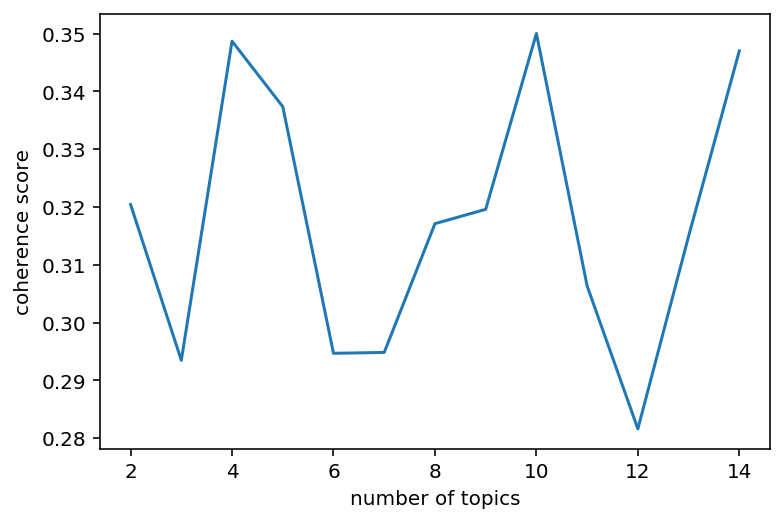

In [19]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [20]:
perplexity_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

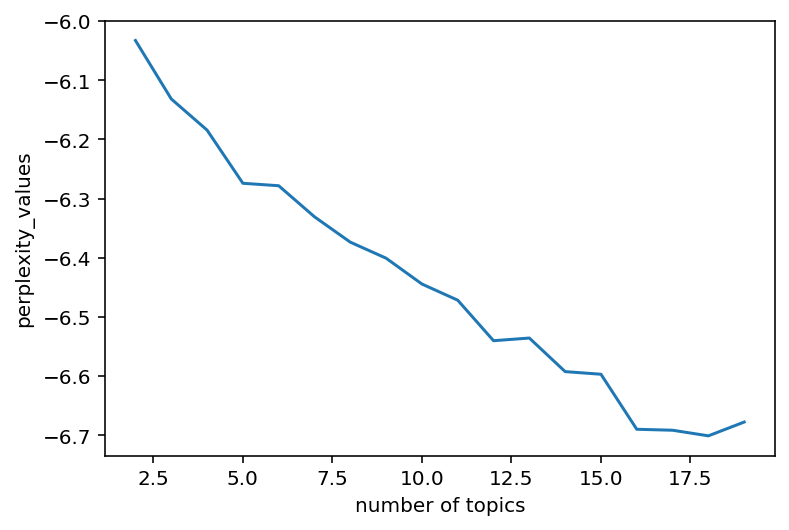

In [21]:
x=range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity_values")
plt.show()

In [22]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, alpha=0.1, id2word = dictionary)

In [23]:
ldamodel.print_topics(num_words=10)

[(0,
  '0.061*"네이버" + 0.052*"주가" + 0.024*"라인" + 0.014*"종목" + 0.014*"하락" + 0.012*"주식" + 0.010*"상장" + 0.010*"긍정적" + 0.010*"종목플러스" + 0.010*"플러스"'),
 (1,
  '0.101*"네이버" + 0.070*"주가" + 0.032*"주식" + 0.021*"만원" + 0.020*"투자" + 0.015*"환산" + 0.014*"라인" + 0.011*"증권" + 0.010*"환산주가" + 0.010*"액면가"'),
 (2,
  '0.076*"네이버" + 0.053*"주가" + 0.026*"목표" + 0.025*"주식" + 0.023*"목표주가" + 0.014*"증권" + 0.012*"카카오" + 0.011*"모바일" + 0.010*"라인" + 0.010*"상향"'),
 (3,
  '0.092*"네이버" + 0.080*"주식" + 0.021*"취득" + 0.018*"의장" + 0.018*"이해" + 0.013*"주가" + 0.011*"라인" + 0.011*"대박" + 0.010*"투자" + 0.008*"대표"'),
 (4,
  '0.069*"네이버" + 0.052*"주식" + 0.021*"라인" + 0.021*"만주" + 0.017*"주가" + 0.017*"상장" + 0.013*"의장" + 0.013*"이해" + 0.009*"교환" + 0.009*"대박"'),
 (5,
  '0.107*"네이버" + 0.059*"주식" + 0.049*"주가" + 0.020*"증권" + 0.017*"이해" + 0.015*"만원" + 0.014*"투자" + 0.014*"서비스" + 0.014*"목표주가" + 0.014*"목표"'),
 (6,
  '0.072*"네이버" + 0.062*"주가" + 0.016*"목표" + 0.012*"목표주가" + 0.012*"매수" + 0.012*"상향" + 0.011*"미래" + 0.011*"주식" + 0.008*"증권가" + 0.008*"최고"'),
 (

In [24]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.069936  0.056404       1        1  19.631239
9      0.038516 -0.017427       2        1  14.982690
8     -0.057193  0.072986       3        1  12.471363
3      0.129733 -0.033262       4        1  12.052713
7     -0.136629 -0.072315       5        1  11.407174
1      0.001438  0.060524       6        1  10.740151
2     -0.023021  0.038544       7        1   6.577785
6     -0.044529  0.026588       8        1   4.164546
4      0.038724 -0.088358       9        1   4.046271
0     -0.016974 -0.043685      10        1   3.926069, topic_info=    Term        Freq       Total Category  logprob  loglift
3     주가  215.000000  215.000000  Default  30.0000  30.0000
20    주식  170.000000  170.000000  Default  29.0000  29.0000
0    네이버  383.000000  383.000000  Default  28.0000  28.0000
27   카카오   33.000000   33.000000  Default  27.0000  27.0000
44    목표   34.000000   34.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
412   평가    0.794031    6.064413  Topic10  -5.2743   1.2045
53    환산    0.794025   12.451134  Topic10  -5.2743   0.4851
199   기술    0.794022    3.037885  Topic10  -5.2743   1.8957
507   초고    0.794022    3.883268  Topic10  -5.2743   1.6502
264   논란    0.794021    5.210805  Topic10  -5.2743   1.3562

[644 rows x 6 columns], token_table=      Topic      Freq Term
term                      
992       3  0.662106   가능
150       3  0.662109  가능성
506       1  0.257516   가주
506       6  0.515033   가주
506      10  0.257516   가주
...     ...       ...  ...
402      10  0.435381   효과
317       3  0.460621   흐름
317       8  0.460621   흐름
368       3  0.314664   희비
368       5  0.629327   희비

[993 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 9, 4, 8, 2, 3, 7, 5, 1])

In [34]:
pyLDAvis.save_html(vis, 'topicmodeling-daum_kakao.html')

In [44]:
kk = ldamodel.show_topic(10, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(3)

,0,1
0,카카오,0.028184
1,뱅크,0.020575
2,금융,0.018027


In [38]:
kk2.to_csv('top5.csv', encoding="euc-kr")

In [43]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key =lambda x: (x[1]), reverse= True)
        
        
        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index = True)
            else:
                break
    return(topic_table)

In [44]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

,문서번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.9603,"[(5, 0.9603083)]"
1,1,4.0,0.9418,"[(0, 0.011629428), (1, 0.011629567), (2, 0.011..."
2,2,4.0,0.5805,"[(4, 0.58051276), (5, 0.3900697)]"
3,3,1.0,0.9569,"[(1, 0.9568874)]"
4,4,5.0,0.8611,"[(0, 0.027788874), (1, 0.027786823), (2, 0.027..."
5,5,0.0,0.9528,"[(0, 0.9528217)]"
6,6,1.0,0.7475,"[(0, 0.01041821), (1, 0.7474807), (2, 0.010418..."
7,7,0.0,0.5267,"[(0, 0.52671385), (1, 0.420642), (2, 0.0131602..."
8,8,4.0,0.7866,"[(0, 0.01163), (1, 0.16686413), (2, 0.01162921..."
9,9,3.0,0.9342,"[(0, 0.013159871), (1, 0.01315929), (2, 0.0131..."


In [45]:
topictable.to_csv("토픽테이블.csv", encoding = "euc-kr", index = False)